# Part II - Explanatory Data Visualization - Effect of User Type on bike trip durations

## by Nndweleni Sundani

## Summary of Findings

The main variable of interest was the duration of rides. Therefore the rest of my exploration was centered around finding and analysing factors that have an effect on the trips durations. I started exploring my data looking at the frequency of each variable in isolation, and this provided useful insight whereby i was able to see the contribution made by each variable. I plotted the distribution of duration of rides on a log-scale and it resulted in a graph which resembles a normal distribution with a peak number of riders riding for durations between 8 minutes and 11 minutes, and very few riders riding for just above 30 minutes. 

While exploring my data further (comparing variables in pairs), what stood out for me was the fact that the two User types had significant differences when it comes to the duration of trips. I observed that Customers users tend to ride for longer durations. The trip start hour and the trip days of the week were other variables which indicated some relationship with the trip durations and this was also investigated further along with the main variable of interest.

I went further, and compared three variables at the same time in order to look deeper and verify the relationships that exists which relates to the duration of trips. I verified that Customers do actually spend more time riding a bike than Subscribers in the whole week (reaching a peak on weekends). Having plotted a point-plot graph, i was able to verify that, on average customers have a longer trip duration than Subscribers, and it further showed that their trip duration significantly improved from the morning and reaches its peak in the afternoon (13:00), while the average duration of subscribers tend to stay constant for the most part of the day. The majority of Customers are likely to be tourists or occasional users and therefore would not nesessarily need to subscribe to the service. 

## Investigation Overview

In this investigation, i wanted to investigate the variables which affects the duration of the trip. My main focus was on the User type, Start day of the week, and Trip start hour.



## Dataset Overview

This dataset consisted of information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset includes 183412 observations, and 12 features/attributes for February 2019 only. Features such as Duration(minutes), Trip day of the week, Trip start hour, Member age, and Age group were added as they were not originally provided in the dataset.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import calendar
import datetime

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
clean_bike = pd.read_csv('fordgobike_data_clean.csv')
clean_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173742 entries, 0 to 173741
Data columns (total 15 columns):
duration_sec               173742 non-null int64
start_time                 173742 non-null object
end_time                   173742 non-null object
start_station_name         173742 non-null object
end_station_name           173742 non-null object
end_station_longitude      173742 non-null float64
user_type                  173742 non-null object
member_birth_year          173742 non-null int64
member_gender              173742 non-null object
bike_share_for_all_trip    173742 non-null bool
member_age                 173742 non-null int64
age_group                  173742 non-null object
trip_dayofweek             173742 non-null object
trip_start_hour            173742 non-null int64
duration_min               173742 non-null float64
dtypes: bool(1), float64(2), int64(4), object(8)
memory usage: 18.7+ MB


In [4]:
# convert to categorical types

clean_bike['user_type'] = clean_bike['user_type'].astype('category')
clean_bike['member_gender'] = clean_bike['member_gender'].astype('category')
clean_bike['trip_start_hour'] = clean_bike['trip_start_hour'].astype('category')

In [8]:
# convert days of the week to ordered categorical types

daysofweek = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ordered_daysofweek = pd.api.types.CategoricalDtype(ordered  = True, categories = daysofweek)
clean_bike['trip_dayofweek'] = clean_bike['trip_dayofweek'].astype(ordered_daysofweek)

In [10]:
# verify changes
clean_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173742 entries, 0 to 173741
Data columns (total 15 columns):
duration_sec               173742 non-null int64
start_time                 173742 non-null object
end_time                   173742 non-null object
start_station_name         173742 non-null object
end_station_name           173742 non-null object
end_station_longitude      173742 non-null float64
user_type                  173742 non-null category
member_birth_year          173742 non-null int64
member_gender              173742 non-null category
bike_share_for_all_trip    173742 non-null bool
member_age                 173742 non-null int64
age_group                  173742 non-null object
trip_dayofweek             173742 non-null category
trip_start_hour            173742 non-null category
duration_min               173742 non-null float64
dtypes: bool(1), category(4), float64(2), int64(3), object(5)
memory usage: 14.1+ MB


## (Visualization 1) - Distribution of rides durations

Distribution of trip durations plotted on a logarithmic scale produces a graph which resembles a normal distribution.  It shows a peak number of riders riding for durations between 8 minutes and 11 minutes, and very few riders riding for just above 30 minutes

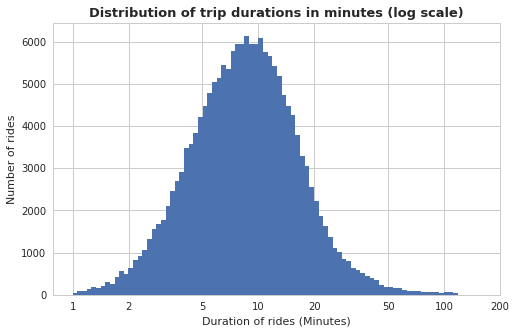

In [12]:
log_binsize = 0.025
bins = 10**np.arange(0, np.log10(clean_bike['duration_min'].max())+log_binsize, log_binsize)
sns.set(style="whitegrid")

plt.figure(figsize=[8,5])
plt.hist(data=clean_bike, x='duration_min', bins=bins)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200], [1, 2, 5, 10, 20, 50, 100, 200])

plt.xlabel('Duration of rides (Minutes)')
plt.ylabel('Number of rides')
plt.title('Distribution of trip durations in minutes (log scale)', fontsize=13, fontweight='bold')
plt.show()



## (Visualization 2) - Proportion of rides based user types

Most users (90.6%) are subscribers, and very few are customers.

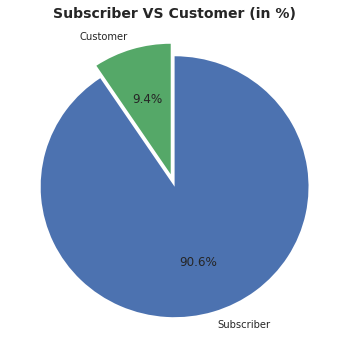

In [15]:
# Plot pie chart in percentages

plt.figure(figsize=[6, 6])
explode = (0, 0.1)
sorted_counts = clean_bike['user_type'].value_counts()
plt.pie(sorted_counts, explode=explode, labels=sorted_counts.index,
       autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Subscriber VS Customer (in %)', fontsize=14, fontweight='bold')
plt.show()

## (Visualization 3) -  Mean trip duration based on the days of the week and user type
Customers spend more time riding a bike than Subscribers in the whole week. The average duration for customers is higher on Mondays, and on weekends (reaching a peak on Sundays), while subscribers have a relatively constant average duration throughout the week except for Weekends where it slightly increases.

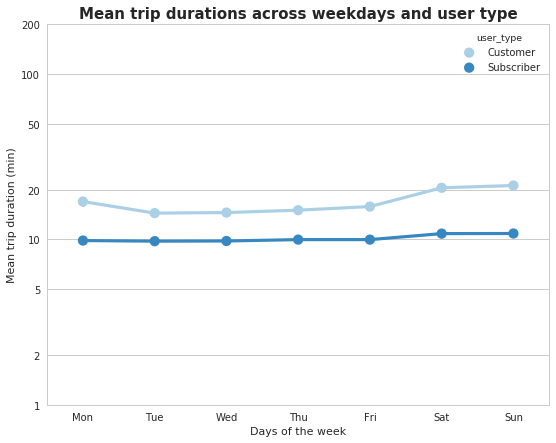

In [17]:
# Point plot 

fig = plt.figure(figsize=[9,7]);
ax = sns.pointplot(data=clean_bike, x='trip_dayofweek', y='duration_min', hue='user_type',
                  palette='Blues')

plt.title('Mean trip durations across weekdays and user type', fontsize=15, fontweight='bold')
plt.ylabel('Mean trip duration (min)')
plt.xlabel('Days of the week')
plt.yscale('log')
plt.yticks([1, 2, 5, 10, 20, 50, 100, 200], [1, 2, 5, 10, 20, 50, 100, 200])
plt.show()

## (Visualization 4) - Daily mean bike trips duration trends by user type and trip start hour

The mean trip duration for Customers is longer than that of Subscribers. The mean duration for Customers gradually improves from the morning and reaches its peak in the afternoon (13:00), while the mean duration of subscribers tend to stay constant for the most part of the day.

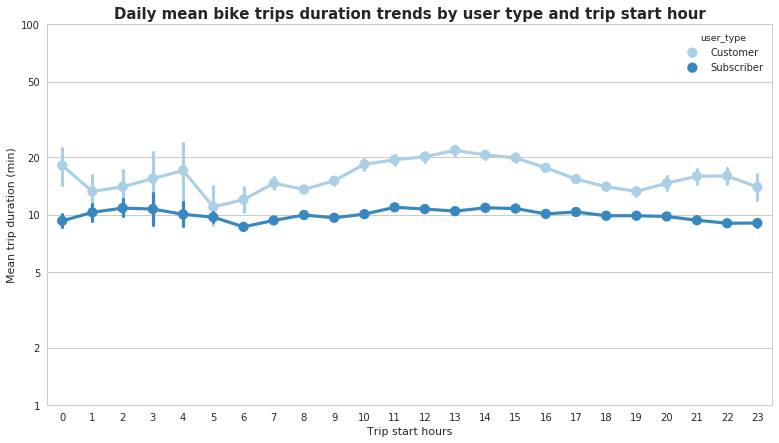

In [16]:
# Point plot 

fig = plt.figure(figsize=[13,7]);
ax = sns.pointplot(data=clean_bike, x='trip_start_hour', y='duration_min', hue='user_type',
                  palette='Blues')

plt.title('Daily mean bike trips duration trends by user type and trip start hour', fontsize=15, fontweight='bold')
plt.ylabel('Mean trip duration (min)')
plt.xlabel('Trip start hours')
plt.yscale('log')
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100])
plt.show()

## (Visualization 5) - Weekly bike trips trends by user type and trip start hour
<b>For both customers and Subscribers,</b> on Mondays-Fridays, Most activities happens from 7:00 to 9:00 (peak at 8:00), and again on 16:00 to 18:00 (peak at 17:00). <b>For customers,</b> on Saturdays-Sundays, most activities happens from 10:00 to 17:00 (peak at 13:00 to 14:00). <b>For Subscribers,</b> on Saturdays-Sundays, activities are very limited and it is a little busier from 10:00 to 16:00 when comparing with other times of the day.

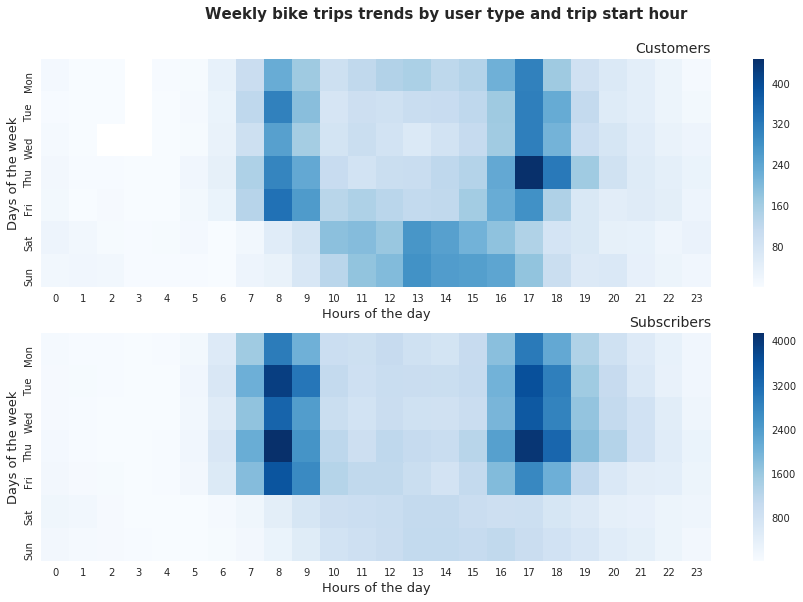

In [18]:
plt.figure(figsize=(15,9))

plt.subplot(2, 1, 1)
customers = clean_bike.query('user_type == "Customer"')
cus_counts = customers.groupby(['trip_dayofweek', 'trip_start_hour']).size()
cus_counts = cus_counts.reset_index(name='count')
cus_counts = cus_counts.pivot(index='trip_dayofweek', columns='trip_start_hour', values='count')
sns.heatmap(cus_counts, cmap='Blues')
plt.title('Customers', loc='right', fontsize=14)
plt.xlabel('Hours of the day', fontsize=13)
plt.ylabel('Days of the week', fontsize=13)

plt.subplot(2, 1, 2)
subscribers = clean_bike.query('user_type == "Subscriber"')
subs_counts = subscribers.groupby(['trip_dayofweek', 'trip_start_hour']).size()
subs_counts = subs_counts.reset_index(name='count')
subs_counts = subs_counts.pivot(index='trip_dayofweek', columns='trip_start_hour', values='count')
sns.heatmap(subs_counts, cmap='Blues')
plt.title('Subscribers', loc='right', fontsize=14)
plt.xlabel('Hours of the day', fontsize=13)
plt.ylabel('Days of the week', fontsize=13)

plt.subplots_adjust(top=0.9)
plt.suptitle('Weekly bike trips trends by user type and trip start hour', fontsize=15, fontweight='bold')
plt.show()